In [1]:
import os
import numpy as np
import tifffile as tff
from glob import glob
from skimage.io import imsave
import exifread
import matplotlib.pyplot as plt


In [3]:
savePath = '/Users/zhengj10/Desktop/'
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/ws/'
# imgPath = '/Volumes/Backup Plus/ws/'
os.path.exists(imgPath)


True

#### Grab timing info of single tif files

In [26]:
def get_singletif_timing(img):
# Open image file for reading (binary mode)

    with open(img, 'rb') as f:
    # Return Exif tags
    
        tags = exifread.process_file(f)
        # Print the tag/ value pairs
        
        for tag in tags.keys():
        # if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
#             print ("Key: %s, value %s" % (tag, tags[tag]))

            img_des = (tags['Image ImageDescription']).values
            time_from_start = int(img_des[622:626])
            time_from_last = int(img_des[-6:-2])
            frame_timing = time_from_start+time_from_last
    return time_from_start,time_from_last,frame_timing


#### Grab timing info of multipage tif files

In [4]:
def get_multitif_timing(img):
    with open(img, 'rb') as f:
        a = f.readlines()

        time_from_start_list = [s for s in a if b' Time_From_Start =' in s]
    #     print(time_from_start_list)
        time_from_last_list = [s for s in a if b' Time_From_Last =' in s]
        time_from_start = []
        time_from_last = []
        frames_timing = []
        for frame in range(len(time_from_start_list)):
            time_from_start_single_frame = int(time_from_start_list[frame][-6:-2].decode("utf-8"))
            time_from_last_single_frame = int(time_from_last_list[frame][-6:-2].decode("utf-8"))
            time_from_start.append(time_from_start_single_frame)
            time_from_last.append(time_from_last_single_frame)
            frames_timing.append(time_from_start[frame]+time_from_last[frame])

    return time_from_start,time_from_last,frames_timing


#### Grab F and frame timing of single tif files

In [27]:
frame_time_1 = []


imgFiles = glob(os.path.join(imgPath,'Image7*'))
imgFiles = sorted(imgFiles)
print(len(imgFiles))

#     print (type(img_stack))
frames_timing = []
for imgFile in imgFiles:

    time_from_start,time_from_last,frame_timing = get_singletif_timing(imgFile)
    frames_timing.append(frame_timing)
    
frames_timing = np.array(frames_timing)       

frame_time_1.append(frames_timing)
    


3198


In [50]:
frames_timing = frames_timing/10

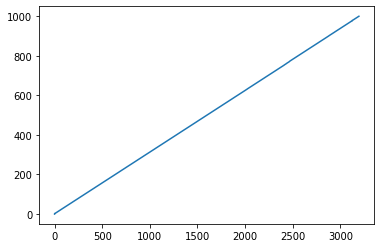

In [51]:
plt.plot(frames_timing[:-3])

In [83]:
imgFiles[2]

'/Volumes/genie/Jihong_GENIE_stuff/ws/Image7_00003.tif'

In [101]:
img = imgFiles[3]
with open(img, 'rb') as f:
    # Return Exif tags

    tags = exifread.process_file(f)
    # Print the tag/ value pairs

    for tag in tags.keys():
    # if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
#             print ("Key: %s, value %s" % (tag, tags[tag]))

        img_des = (tags['Image ImageDescription']).values
img_des


'Created by Hamamatsu Inc.\r\nMon, 05 Oct 2020 16:35:10 Eastern Daylight Time\r\n\r\n[ CALIBRATION ]\r\ntitle = Default\r\nunits = Pixels\r\nsymbol = Px\r\nfactor = 1.000000\r\nmagnification = 4.000000\r\nscale_len = 100.000000\r\n\r\n[ CAPTURE DEVICE ]\r\n Camera Type = D_CAM\r\n Camera Name = C13440-20C S/N: 302296\r\n Camera Size = 2048x2048\r\n Bit Depth = 16-Bit\r\n Binning = 4\r\n Capture Region = (X0=0, Y0=248, Width=512, Height=16)\r\n\r\n[ CAPTURE SETTINGS ]\r\n Temperature = -10.00\r\n Filter1 =  Default Idle Positions\r\n Tint1 = None\r\n eOffset1 = 1600.00\r\n eCoeff1 = 0.46000\r\n Exposure1 = 0.000312 s\r\n\r\n[ CAPTURE TIME ]\r\n Time_From_Start = 00:00:00.0015\r\n Time_From_Last = 00:00:00.0003\r\n'

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# daq_file = h5py.File(imgPath + '/trial_0007.h5','r')
daq_file = h5py.File('/Volumes/genie/Jihong_GENIE_stuff/201020/cell_2/trial_0012.h5','r')

In [86]:
for k in daq_file.keys():
    print(k)

header
sweep_0012


In [88]:
data = daq_file['sweep_0012']['digitalScans'][()]

In [89]:
data = np.squeeze(data)

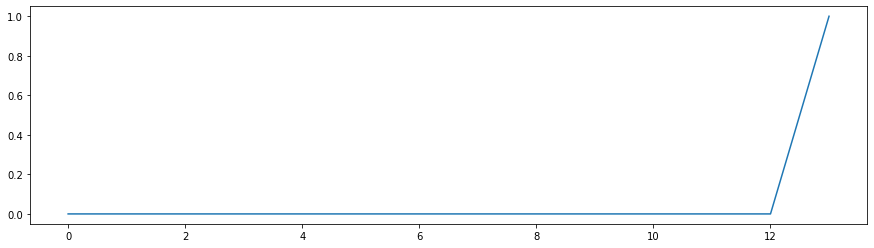

In [69]:
fig = plt.figure(figsize=[15,4])
# x_start = 0
# x = np.linspace(0,2000,80000)

# plt.plot(x,data)

# # x1 = frames_timing[:-3]
# y1 = np.ones(3195)
# # plt.scatter(x1,y1,color='m')
# plt.xlim([x_start,x_start+10])
plt.plot(data[:14])
plt.show()

In [70]:
plt.plot(frames_timing[:10])
# plt.xlim([0,10])


NameError: name 'frames_timing' is not defined

In [97]:
frames_timing[4]

2.1

In [71]:
data.shape

(80000,)

In [72]:
peaks = np.where(data==1)

In [73]:
peaks[0].shape

(25601,)

In [74]:
peaks[0][:5]

array([13, 14, 15, 16, 26])

In [75]:
len(peaks[0])

25601

In [76]:
peak_no = [peak for peak in range(1,peaks[0].shape[0]) if peaks[0][peak]-peaks[0][peak-1]!=1]
# peak_no = peak_no+1 # The 1st peak is not counted above

In [77]:
first = [0]

In [78]:
peaks_idx = first+peak_no

In [79]:
peak_time = []
for time_point in peaks_idx:
    peak_time.append(peaks[0][time_point])
    
    

In [80]:
peak_time = np.array(peak_time)/40.0

In [68]:
peak_time[1600]

499.25

In [81]:
peak_time[1600]

499.25

In [87]:
a = data

In [90]:
b = data

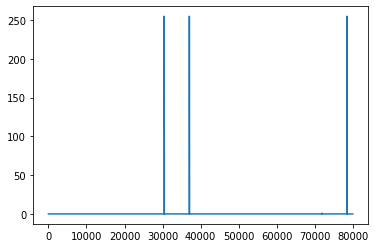

In [92]:
plt.plot(a-b)

In [102]:
f_all_1 = []
frame_time_1 = []

for trial in range(4):
   
    print(trial+1)
#     imgFiles = glob(os.path.join(imgPath,'trial_'+str(trial+1) + '/*.tif'))
    imgFiles = glob(os.path.join(imgPath,'Image7'))
    imgFiles = sorted(imgFiles)
    print(len(imgFiles))
    img_stack = []
#     print (type(img_stack))
    frames_timing = []
    for imgFile in imgFiles:

        time_from_start,time_from_last,frame_timing = get_singletif_timing(imgFile)
        frames_timing.append(frame_timing)
        imgFile = tff.TiffFile(imgFile)
        imgFile = imgFile.asarray()
        img_stack.append(imgFile)
    
    frames_timing = np.array(frames_timing)       
    img_stack = np.array(img_stack)
                         
    print(img_stack.shape)
                         
    f_single_trial = []
    for frame in range(img_stack.shape[0]):
        act_pixels = img_stack[frame,:,230:282]
        f = np.mean(act_pixels)
        f_single_trial.append(f)
    f_single_trial = np.array(f_single_trial)
    
    f_all_1.append(f_single_trial)
    frame_time_1.append(frames_timing)
    
print('Total trials: %d' %(len(f_all_1)))


1
0
(0,)
2
0
(0,)
3
0
(0,)
4
0
(0,)
Total trials: 4


#### Grab F and frame timing of multipage tif files

In [103]:
f_all_2 = []
frame_time_2 = []

for trial in range(4,14):
   
    print(trial+1)
    imgFile = glob(os.path.join(imgPath,'trial_'+str(trial+1) + '/*.tif'))
    imgFile = imgFile[0]

    time_from_start,time_from_last,frames_timing = get_multitif_timing(imgFile)
    imgFile = tff.TiffFile(imgFile)
    imgFile = imgFile.asarray()
    print(imgFile.shape)
    
    time_from_start = np.array(time_from_start)
    time_from_last = np.array(time_from_last)
    frames_timing = np.array(frames_timing)
    
    img_stack = np.squeeze(imgFile)
   
    print(img_stack.shape)
       
    f_single_trial = []
    for frame in range(img_stack.shape[0]):
        act_pixels = img_stack[frame,:,230:282]
        f = np.mean(act_pixels)
        f_single_trial.append(f)
    f_single_trial = np.array(f_single_trial)
    f_all_2.append(f_single_trial)
    frame_time_2.append(frames_timing)
    
print('Total trials: %d' %(len(f_all_2)))


5


IndexError: list index out of range

In [7]:
f_all = f_all_1 + f_all_2
frame_time = frame_time_1 + frame_time_2
f_all = np.array(f_all)
frame_time = np.array(frame_time)

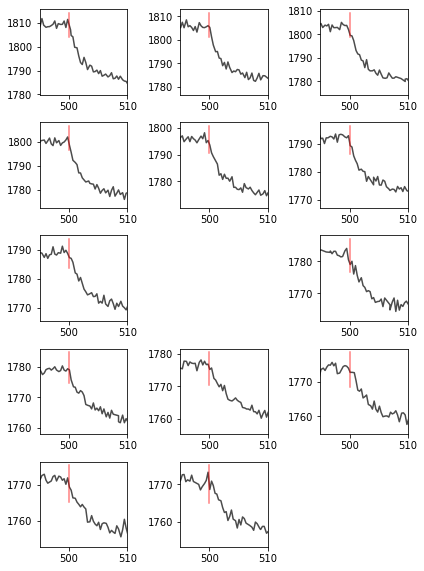

In [29]:
frame_time_x = frame_time / 10.0
fig = plt.figure(figsize=[6,8])
x = 500 # (with alignment)
# x = 590 # (without alignment)
for i in range(f_all.shape[0]):
    if i == 7:
        continue
    ax = plt.subplot(5,3,i+1)
    
### Plot with alignment
    ax.plot(frame_time_x[i][1000:2000],f_all[i][1000:2000],color='k',alpha=0.7)
    ax.set_xlim([495,510])

# ### Plot without alignment
#     ax.plot(f_all[i][1000:2000],color='k',alpha=0.7)
#     ax.set_xlim([575,620])
    
    
    y_top = ax.get_ylim()[1]
    y_bottom = ax.get_ylim()[1]-10
    ax.plot([x,x],[y_top,y_bottom],color='r',alpha=0.5)
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/476.1_F_aligned.png',dpi=1200)


#### Mean F of aligned F traces

In [33]:
f_mean_all = []
for i in range(f_all.shape[0]):
    if i ==7:
        continue
    f_mean_all.append(f_all[i][:3000])

In [34]:
f_mean = np.mean(f_mean_all, axis=0)

(1550, 1660)

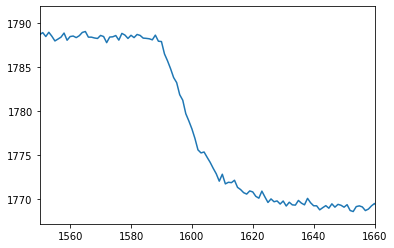

In [35]:
plt.plot(f_mean)
plt.xlim([1550,1660])

#### Example image

In [36]:
imgFiles = glob(os.path.join(imgPath,'trial_1' + '/*.tif'))
imgFiles = sorted(imgFiles)
#     print(len(imgFiles))
img_stack = []
#     print (type(img_stack))
frames_timing = []
for imgFile in imgFiles:

    time_from_start,time_from_last,frame_timing = get_singletif_timing(imgFile)
    frames_timing.append(frame_timing)
    imgFile = tff.TiffFile(imgFile)
    imgFile = imgFile.asarray()
    img_stack.append(imgFile)

In [37]:
meanImg = np.mean(img_stack, axis=0)

In [38]:
from skimage.io import imsave

In [41]:
imsave(savePath+'/mean_img.tif',meanImg,plugin='tifffile')

In [ ]:
ax = plt.subplot(111)
ax.plot(frame_time_2[3][1000:2000],f_all_2[3][1000:2000])
ax.set_xlim([4950,5050])
ax.plot([x,x],[1760,1800],color='m')
plt.show()


In [ ]:
a = [1,2]
b = ['tom','john']
a+b

In [ ]:
import matplotlib.pyplot as plt

for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.plot(f_all[i])
    ax.set_xlim([1580,1620])

plt.show()

In [ ]:
imgFiles = glob(imgPath + '/*.tif')
imgFiles = sorted(imgFiles)
len(imgFiles)

In [ ]:
imgFile = []
for img in imgFiles:
    img = tff.TiffFile(img)
    img = img.asarray()
    imgFile.append(img)
len(imgFile)

In [ ]:
imgFile = np.array(imgFile)
imgFile.shape

In [ ]:
imsave(savePath + 'Voltron-ST-3200Hz_trial2.tif', imgFile.astype('float32'), plugin='tifffile', photometric='minisblack')

In [ ]:
imgFile_2 = tff.TiffFile(savePath + '1st.tif')
imgFile_2 = imgFile_2.asarray()
imgFile_2.shape


In [ ]:
np.min(imgFile_2)

In [ ]:
imgFile = np.concatenate((imgFile_2,imgFile_3),axis=0)
imgFile.shape


In [ ]:
ave_img_file = []
block = []
for i in range(imgFile.shape[0]):

    block.append(imgFile[i,:,:])
    if (i+1)%10 == 0:
        ave_frame=np.mean(block,axis=0)
        ave_img_file.append(ave_frame)
        block = []
#         continue


In [ ]:
imgFile.shape

In [ ]:
len(ave_img_file)

In [ ]:
ave_img_file = np.array(ave_img_file)

In [ ]:
ave_img_file.shape